In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('Fraud.csv')
df.shape

(6362620, 11)

In [3]:
df.head(200)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
195,1,CASH_OUT,210370.09,C2121995675,0.0,0.00,C1170794006,1442298.03,22190.99,0,0
196,1,CASH_OUT,36437.06,C2120063568,0.0,0.00,C1740000325,154606.00,1363368.51,0,0
197,1,CASH_OUT,82691.56,C1620409359,0.0,0.00,C248609774,657983.89,6453430.91,0,0
198,1,CASH_OUT,338767.10,C691691381,0.0,0.00,C453211571,544481.28,3461666.05,0,0


In [4]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


In [5]:
X = df[df['nameDest'].str.contains('M')]
X.head() #Merchant Transactions

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

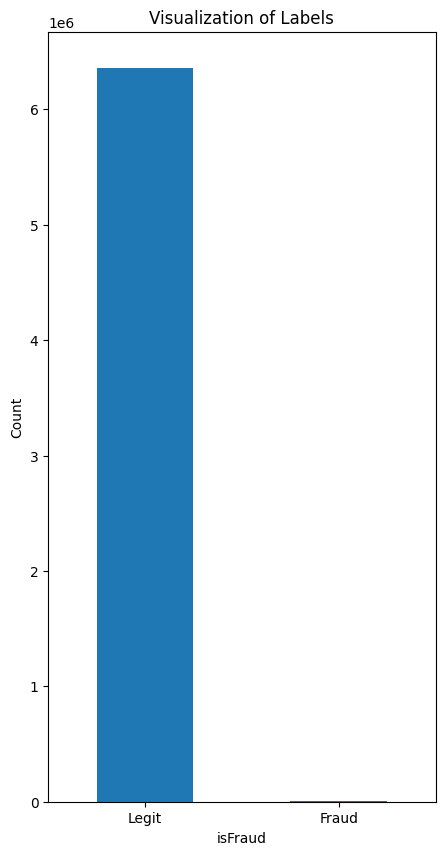

In [7]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [8]:
#creating a copy of original dataset to train and test models

new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
# Checking how many attributes are dtype: object

objList = new_df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [10]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(6)
memory usage: 534.0 MB
None


In [11]:
# Import library for VIF (VARIANCE INFLATION FACTOR)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


In [12]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_df['TransactionPath'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(new_df)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_orig,1.307910
5,Actual_amount_dest,3.754335
6,TransactionPath,2.677167


<Axes: >

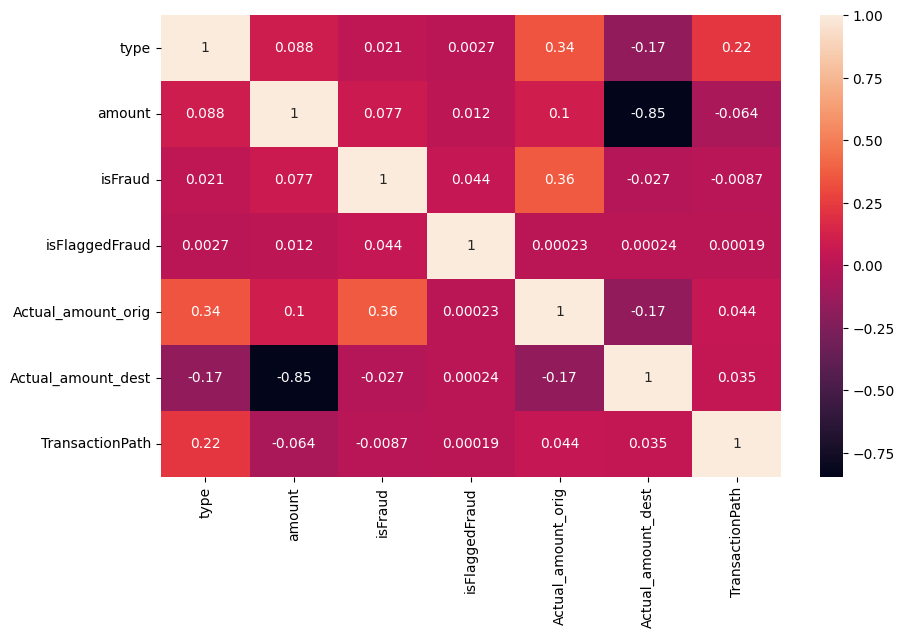

In [13]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [15]:
# Perform Scaling
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

In [16]:
Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

In [17]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Columns of X_train: ", X_train.columns)
print("Columns of X_test: ", X_test.columns)

print("Shape of Y_train: ", Y_train.shape)
print("Shape of Y_test: ", Y_test.shape)



Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)
Columns of X_train:  Index(['type', 'isFlaggedFraud', 'Actual_amount_orig', 'Actual_amount_dest',
       'TransactionPath', 'NormalizedAmount'],
      dtype='object')
Columns of X_test:  Index(['type', 'isFlaggedFraud', 'Actual_amount_orig', 'Actual_amount_dest',
       'TransactionPath', 'NormalizedAmount'],
      dtype='object')
Shape of Y_train:  (4453834,)
Shape of Y_test:  (1908786,)


In [18]:
X.head()

,type,isFlaggedFraud,Actual_amount_orig,Actual_amount_dest,TransactionPath,NormalizedAmount
0,3,0,9839.64,0.0,2419963.0,-0.281560
1,3,0,1864.28,0.0,3922922.0,-0.294767
2,4,0,181.00,0.0,1441841.0,-0.297555
3,1,0,181.00,21182.0,6219958.0,-0.297555
4,3,0,11668.14,0.0,4274900.0,-0.278532


In [19]:
X_train.head()

,type,isFlaggedFraud,Actual_amount_orig,Actual_amount_dest,TransactionPath,NormalizedAmount
2408104,0,0,-26771.98,26771.98,2506351.0,-0.253520
662430,1,0,0.00,-344879.65,2034634.0,0.273272
496595,4,0,0.00,-1583803.26,4719184.0,2.786657
5053741,3,0,37739.35,0.00,5807976.0,-0.235358
755621,1,0,22501.00,-376055.12,2364828.0,0.324900


In [20]:
# DECISION TREE

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred_rf = random_forest.predict(X_test)
random_forest_score = accuracy_score(Y_test, Y_pred_rf) * 100

In [21]:
# Print scores of our classifiers

print("Random Forest Score: ", random_forest_score)

Random Forest Score:  99.95887438403257


In [23]:
# key terms of Confusion Matrix - DT

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

TP,FP,TN,FN - Random Forest
True Positives: 1713
False Positives: 63
True Negatives: 1906288
False Negatives: 722
----------------------------------------------------------------------------------------


In [28]:
# confusion matrix - DT

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_dt,)

print("----------------------------------------------------------------------------------------")

Confusion Matrix - Random Forest
[[1906288      63]
 [    722    1713]]
----------------------------------------------------------------------------------------


In [26]:
# classification report - DT

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.70      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.85      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786

----------------------------------------------------------------------------------------


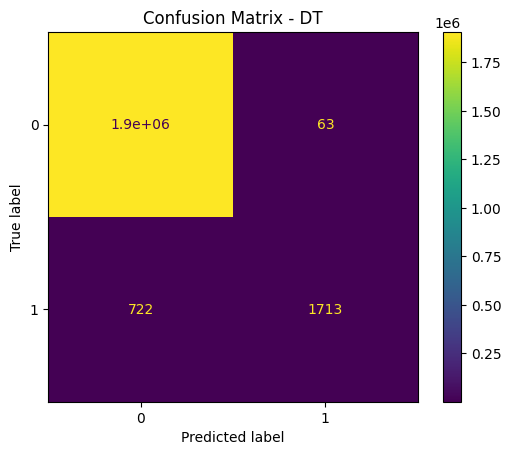

In [29]:
# visualising confusion matrix - DT


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()


In [30]:
# Save the model
import joblib
joblib.dump(random_forest, 'fraud-detection.pkl')

['fraud-detection.pkl']

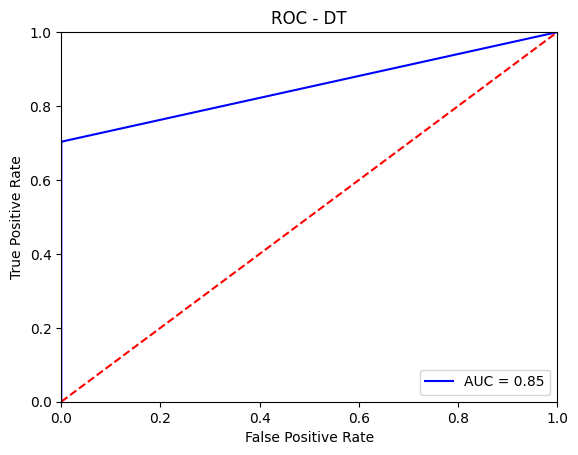

In [32]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [33]:
model = joblib.load('fraud-detection.pkl') 
csv_path = 'Fraud.csv'

In [34]:
fraud_df = pd.read_csv(csv_path)
fraud_df.head()

fraud_df = fraud_df.sample(n=500, random_state=42)

In [35]:
print(fraud_df.shape)
fraud_df.head()

(500, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3737323,278,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0
264914,15,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0
85647,10,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0
5899326,403,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0
2544263,206,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0


In [36]:
scaler = StandardScaler()
fraud_df["NormalizedAmount"] = scaler.fit_transform(fraud_df["amount"].values.reshape(-1, 1))
fraud_df.drop(['isFraud', 'step', 'amount'], axis=1, inplace=True)
fraud_df.head()

,type,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,NormalizedAmount
3737323,CASH_IN,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0.650817
264914,PAYMENT,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,-0.495083
85647,CASH_IN,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0.010716
5899326,TRANSFER,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,5.044702
2544263,CASH_IN,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,-0.255792


In [37]:
objList = fraud_df.select_dtypes(include = "object").columns
print (objList)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    fraud_df[feat] = le.fit_transform(fraud_df[feat].astype(str))

print (fraud_df.info())

Index(['type', 'nameOrig', 'nameDest'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 3737323 to 1617285
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              500 non-null    int64  
 1   nameOrig          500 non-null    int64  
 2   oldbalanceOrg     500 non-null    float64
 3   newbalanceOrig    500 non-null    float64
 4   nameDest          500 non-null    int64  
 5   oldbalanceDest    500 non-null    float64
 6   newbalanceDest    500 non-null    float64
 7   isFlaggedFraud    500 non-null    int64  
 8   NormalizedAmount  500 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 39.1 KB
None


In [38]:
fraud_df['Actual_amount_orig'] = fraud_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
fraud_df['Actual_amount_dest'] = fraud_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
fraud_df.drop('newbalanceOrig', axis=1)
fraud_df.head()

,type,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,NormalizedAmount,Actual_amount_orig,Actual_amount_dest
3737323,0,401,20866.00,351084.42,304,452419.57,122201.15,0,0.650817,-330218.42,330218.42
264914,3,61,30370.00,18722.92,428,0.00,0.00,0,-0.495083,11647.08,0.00
85647,0,190,106589.00,258853.21,100,201303.01,49038.80,0,0.010716,-152264.21,152264.21
5899326,4,327,0.00,0.00,91,3198359.45,4750120.08,0,5.044702,0.00,-1551760.63
2544263,0,445,2921331.58,2999503.88,13,415821.90,337649.60,0,-0.255792,-78172.30,78172.30


In [39]:
fraud_df['TransactionPath'] = fraud_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)
fraud_df = fraud_df.drop(['nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest'], axis=1)
fraud_df.head()

,type,isFlaggedFraud,NormalizedAmount,Actual_amount_orig,Actual_amount_dest,TransactionPath
3737323,0,0,0.650817,-330218.42,330218.42,705.0
264914,3,0,-0.495083,11647.08,0.00,489.0
85647,0,0,0.010716,-152264.21,152264.21,290.0
5899326,4,0,5.044702,0.00,-1551760.63,418.0
2544263,0,0,-0.255792,-78172.30,78172.30,458.0


In [40]:
def risk_scores(fraud_pdf, model):
    fraud_pdf['riskScore'] = model.predict_proba(fraud_pdf[[
                                                 'type',
                                                 'isFlaggedFraud',
                                                 'Actual_amount_orig',
                                                 'Actual_amount_dest',
                                                 'TransactionPath',
                                                 'NormalizedAmount'
    ]])[:, 1]

In [41]:
def predict_fraud(fraud_pdf, model):
    fraud_pdf['fraud'] = model.predict(fraud_pdf[[
                                                 'type',
                                                 'isFlaggedFraud',
                                                 'Actual_amount_orig',
                                                 'Actual_amount_dest',
                                                 'TransactionPath',
                                                 'NormalizedAmount'
                                             ]])
    return fraud_pdf

In [42]:
fraud_df_with_predictions = risk_scores(fraud_df, model)

In [43]:
fraud_df_with_predictions = predict_fraud(fraud_df, model)

In [44]:
fraud_df_with_predictions.head(100)


,type,isFlaggedFraud,NormalizedAmount,Actual_amount_orig,Actual_amount_dest,TransactionPath,riskScore,fraud
3737323,0,0,0.650817,-330218.42,330218.42,705.0,0.000000,0
264914,3,0,-0.495083,11647.08,0.00,489.0,0.110711,0
85647,0,0,0.010716,-152264.21,152264.21,290.0,0.000000,0
5899326,4,0,5.044702,0.00,-1551760.63,418.0,0.000000,0
2544263,0,0,-0.255792,-78172.30,78172.30,458.0,0.000000,0
...,...,...,...,...,...,...,...,...
5880535,3,0,-0.510152,0.00,0.00,695.0,0.196961,0
4060469,2,0,-0.528839,2262.52,-2262.52,467.0,0.290711,0
6175471,0,0,-0.294472,-67418.91,67418.91,244.0,0.000000,0
3356826,3,0,-0.503113,5839.90,0.00,689.0,0.110711,0


In [45]:
print(fraud_df_with_predictions[fraud_df_with_predictions['fraud'] == 1])


         type  isFlaggedFraud  NormalizedAmount  Actual_amount_orig  \
2331654     1               0         -0.462866                0.00   
1414955     1               0         -0.326173                0.00   
3888233     1               0         -0.377414                0.00   
1190184     1               0         -0.536954                0.00   
65782       1               0         -0.442158              365.00   
4167309     1               0         -0.478554                0.00   
3001820     1               0         -0.449162             5088.00   
1688573     1               0         -0.477626                0.00   
6128332     1               0         -0.463417                0.00   
723824      1               0         -0.403868                0.00   
1550278     1               0         -0.394572                0.00   
1588282     1               0         -0.374027                0.00   
6280975     1               0         -0.359415            41623.00   
428096

/tmp/ipykernel_66205/1596273399.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fraud', data=fraud_df_with_predictions, palette='Set2')


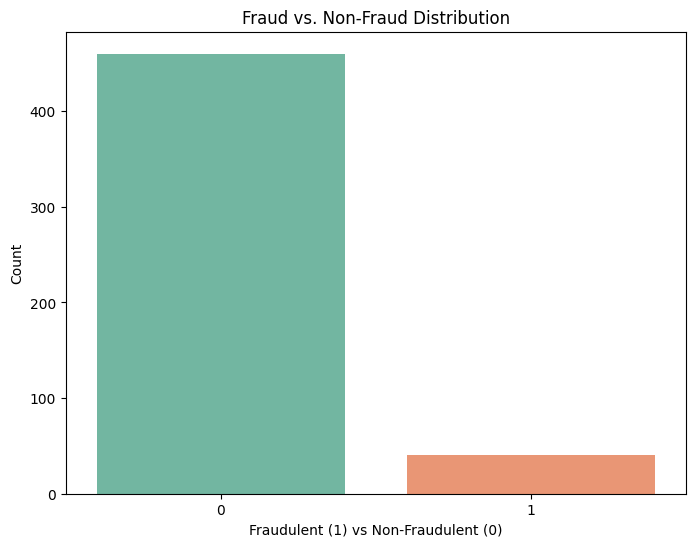

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Fraud vs. Non-Fraud Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='fraud', data=fraud_df_with_predictions, palette='Set2')
plt.title('Fraud vs. Non-Fraud Distribution')
plt.xlabel('Fraudulent (1) vs Non-Fraudulent (0)')
plt.ylabel('Count')
plt.show()

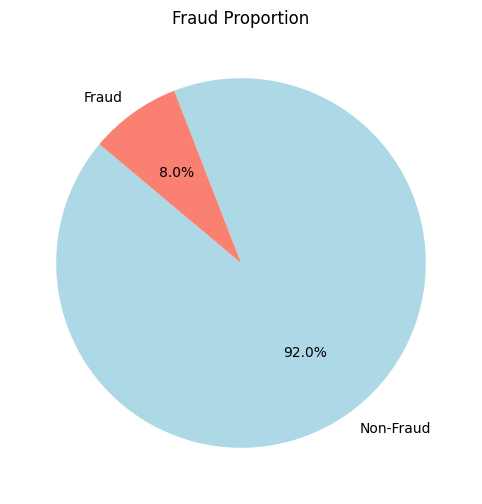

In [47]:
# 2. Fraud Proportion
fraud_counts = fraud_df_with_predictions['fraud'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(fraud_counts, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'salmon'])
plt.title('Fraud Proportion')
plt.show()

/tmp/ipykernel_66205/2582193895.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fraud', y='NormalizedAmount', data=fraud_df_with_predictions, palette='Set1')


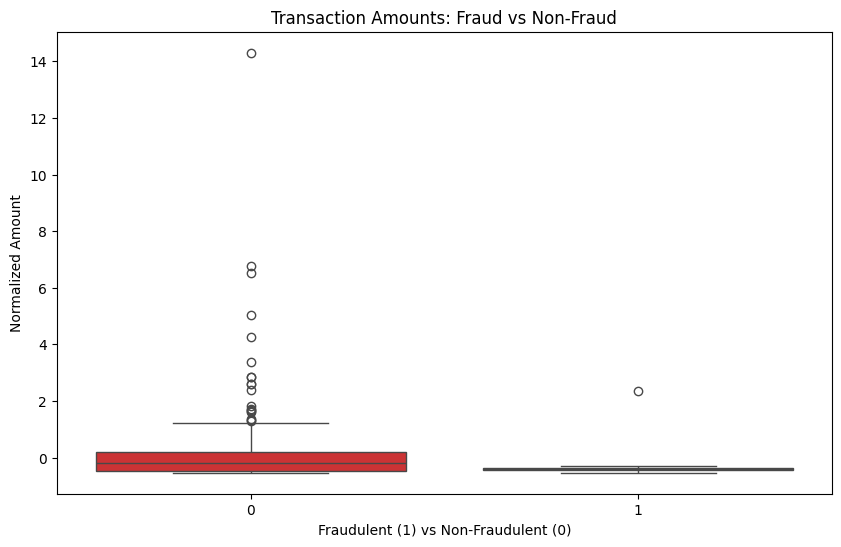

In [48]:
# 3. Transaction Amount Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud', y='NormalizedAmount', data=fraud_df_with_predictions, palette='Set1')
plt.title('Transaction Amounts: Fraud vs Non-Fraud')
plt.xlabel('Fraudulent (1) vs Non-Fraudulent (0)')
plt.ylabel('Normalized Amount')
plt.show()

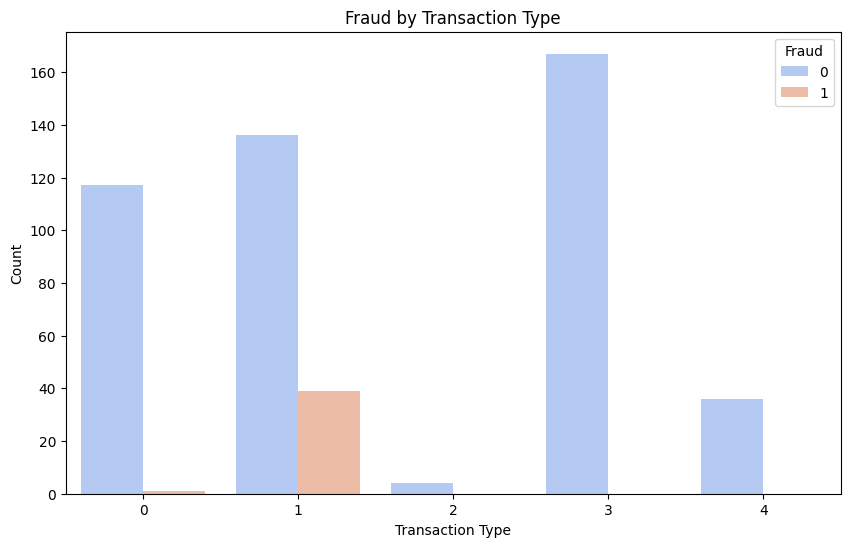

In [49]:
# 4. Fraud by Transaction Type
plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='fraud', data=fraud_df_with_predictions, palette='coolwarm')
plt.title('Fraud by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='Fraud')
plt.show()

In [50]:
# Filter for fraudulent transactions
fraudulent_transactions = fraud_df_with_predictions[fraud_df_with_predictions['fraud'] == 1]

fraudulent_transactions.head()


,type,isFlaggedFraud,NormalizedAmount,Actual_amount_orig,Actual_amount_dest,TransactionPath,riskScore,fraud
2331654,1,0,-0.462866,0.0,-20603.87,748.0,0.686961,1
1414955,1,0,-0.326173,0.0,-58605.72,483.0,0.676961,1
3888233,1,0,-0.377414,0.0,-44360.26,574.0,0.676961,1
1190184,1,0,-0.536954,0.0,-6.58,207.0,0.926961,1
65782,1,0,-0.442158,365.0,-41597.72,622.0,0.510711,1


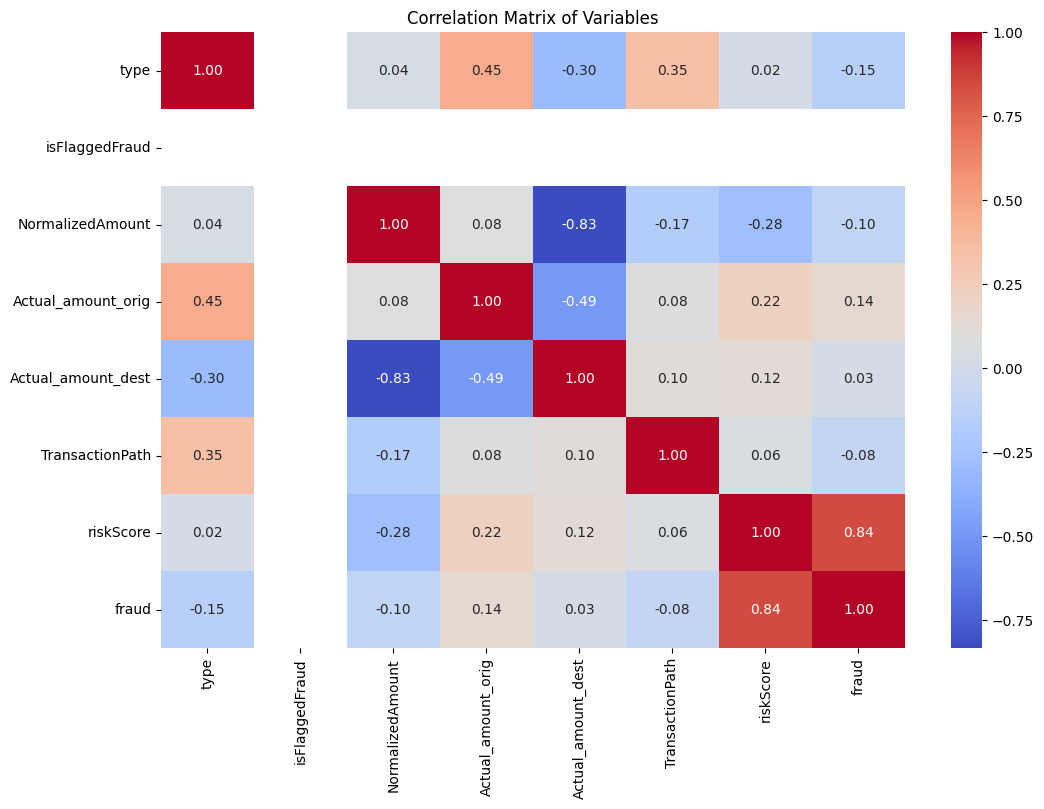

In [51]:
# Compute correlations
correlation_matrix = fraud_df_with_predictions.corr()

# Display the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Variables')
plt.show()


In [55]:
from tabulate import tabulate

# Group by fraud and calculate means
fraud_group_stats = fraud_df_with_predictions.groupby('fraud').mean()

# Display the stats
print("Average Values for Fraud vs Non-Fraud Transactions:")
print(tabulate(fraud_group_stats, headers='keys', tablefmt='fancy_grid'))


Average Values for Fraud vs Non-Fraud Transactions:
╒═════════╤═════════╤══════════════════╤════════════════════╤══════════════════════╤══════════════════════╤═══════════════════╤═════════════╕
│   fraud │    type │   isFlaggedFraud │   NormalizedAmount │   Actual_amount_orig │   Actual_amount_dest │   TransactionPath │   riskScore │
╞═════════╪═════════╪══════════════════╪════════════════════╪══════════════════════╪══════════════════════╪═══════════════════╪═════════════╡
│       0 │ 1.71522 │                0 │           0.029586 │             -26800   │             -78307.6 │           503.293 │   0.0769066 │
├─────────┼─────────┼──────────────────┼────────────────────┼──────────────────────┼──────────────────────┼───────────────────┼─────────────┤
│       1 │ 0.975   │                0 │          -0.340239 │              30092.1 │             -48770   │           449.625 │   0.63193   │
╘═════════╧═════════╧══════════════════╧════════════════════╧══════════════════════╧════════════

/tmp/ipykernel_66205/821548720.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_amount = fraud_df_with_predictions.groupby('AmountBin')['fraud'].mean()


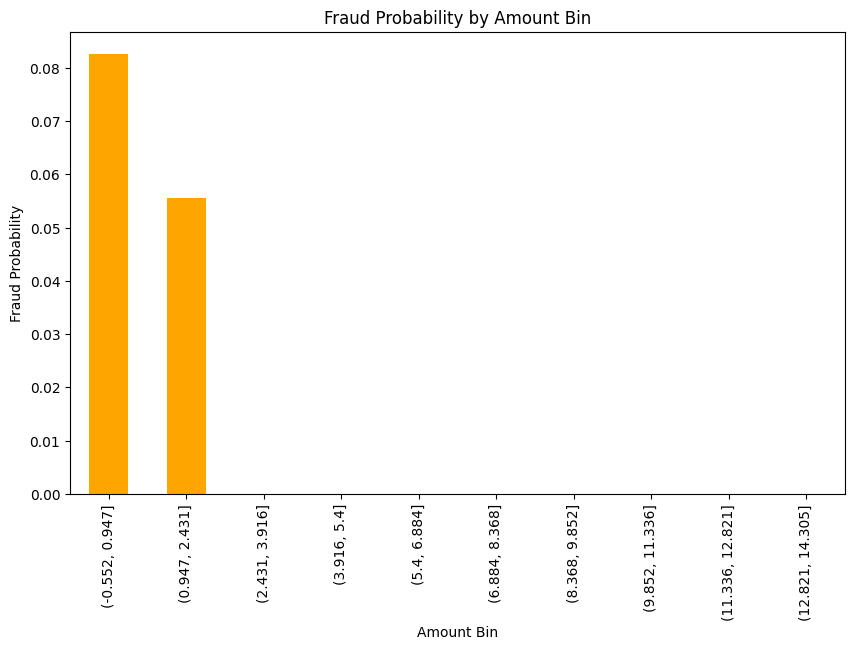

/tmp/ipykernel_66205/821548720.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_amount = fraud_df_with_predictions.groupby('AmountBin')['fraud'].mean()


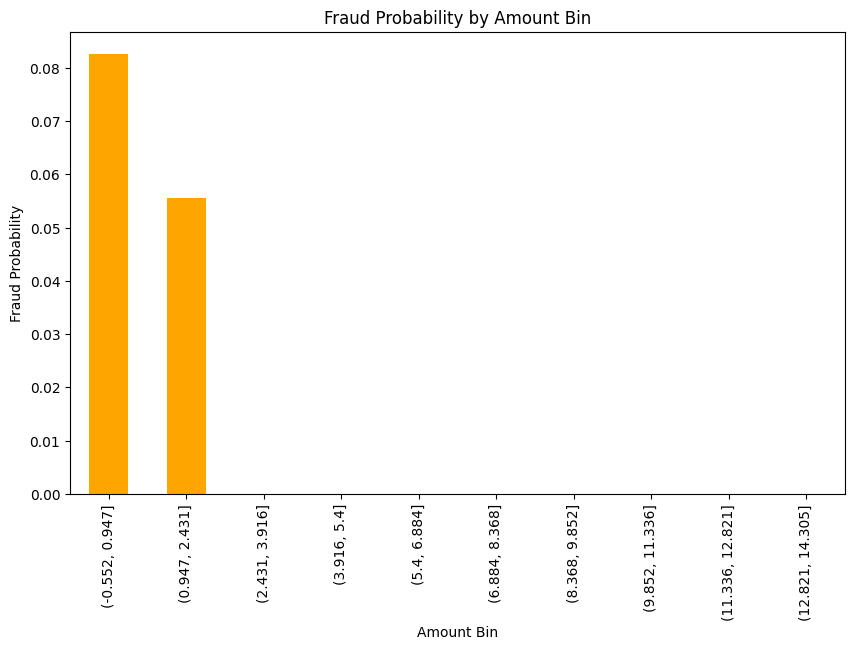

In [56]:
# Bin NormalizedAmount and calculate fraud percentage
fraud_df_with_predictions['AmountBin'] = pd.cut(fraud_df_with_predictions['NormalizedAmount'], bins=10)
fraud_by_amount = fraud_df_with_predictions.groupby('AmountBin')['fraud'].mean()

# Plot fraud probability by amount bins
plt.figure(figsize=(10, 6))
fraud_by_amount.plot(kind='bar', color='orange')
plt.title('Fraud Probability by Amount Bin')
plt.xlabel('Amount Bin')
plt.ylabel('Fraud Probability')
plt.show()
# Bin NormalizedAmount and calculate fraud percentage
fraud_df_with_predictions['AmountBin'] = pd.cut(fraud_df_with_predictions['NormalizedAmount'], bins=10)
fraud_by_amount = fraud_df_with_predictions.groupby('AmountBin')['fraud'].mean()

# Plot fraud probability by amount bins
plt.figure(figsize=(10, 6))
fraud_by_amount.plot(kind='bar', color='orange')
plt.title('Fraud Probability by Amount Bin')
plt.xlabel('Amount Bin')
plt.ylabel('Fraud Probability')
plt.show()


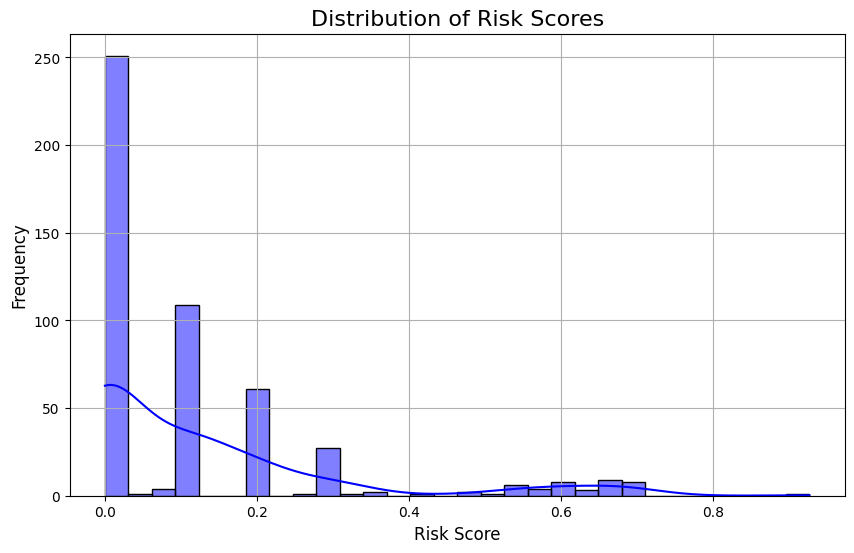

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of risk scores
plt.figure(figsize=(10, 6))
sns.histplot(fraud_df_with_predictions['riskScore'], bins=30, kde=True, color='blue')
plt.title('Distribution of Risk Scores', fontsize=16)
plt.xlabel('Risk Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid()
plt.show()


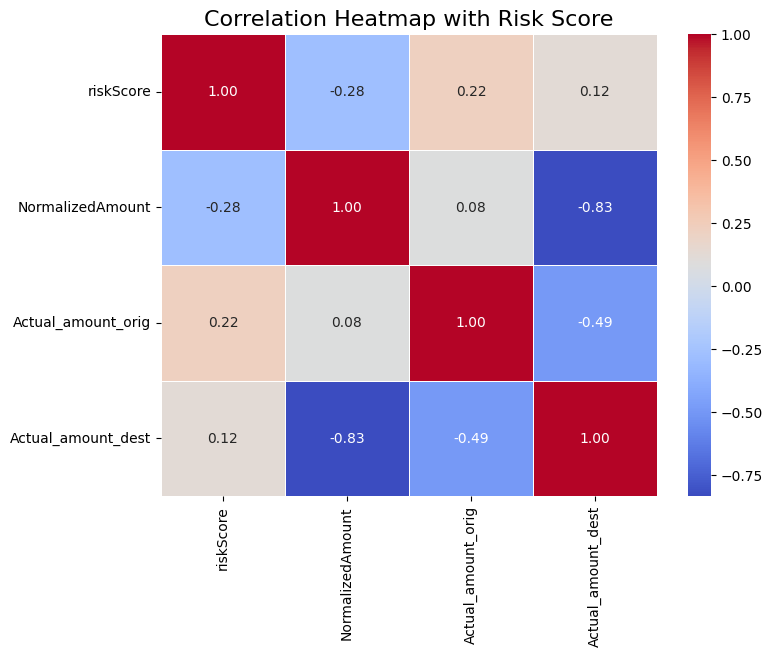

In [58]:
corr_matrix = fraud_df_with_predictions[['riskScore', 'NormalizedAmount', 'Actual_amount_orig', 'Actual_amount_dest']].corr()

# Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap with Risk Score', fontsize=16)
plt.show()


In [59]:
sorted_df = fraud_df_with_predictions.sort_values(by='riskScore', ascending=False)

# Display the sorted dataframe
sorted_df.head(500)

,type,isFlaggedFraud,NormalizedAmount,Actual_amount_orig,Actual_amount_dest,TransactionPath,riskScore,fraud,AmountBin
1190184,1,0,-0.536954,0.0,-6.58,207.0,0.926961,1,"(-0.552, 0.947]"
4432603,1,0,-0.434134,0.0,-28591.42,498.0,0.686961,1,"(-0.552, 0.947]"
1366318,1,0,-0.443873,0.0,-25883.99,544.0,0.686961,1,"(-0.552, 0.947]"
4167309,1,0,-0.478554,0.0,-16242.22,171.0,0.686961,1,"(-0.552, 0.947]"
6128332,1,0,-0.463417,0.0,-20450.59,431.0,0.686961,1,"(-0.552, 0.947]"
...,...,...,...,...,...,...,...,...,...
3208531,4,0,0.430300,0.0,-268912.49,635.0,0.000000,0,"(-0.552, 0.947]"
827151,4,0,1.327490,0.0,-518339.83,512.0,0.000000,0,"(0.947, 2.431]"
866269,1,0,-0.151591,12453.0,-255353.16,393.0,0.000000,0,"(-0.552, 0.947]"
3043288,4,0,-0.120760,0.0,-115712.36,623.0,0.000000,0,"(-0.552, 0.947]"


In [60]:
# Check for unique values in the 'riskScore' column
unique_risk_scores = sorted_df['riskScore'].unique()

# Print the unique values
print("Unique risk scores in the dataframe:", unique_risk_scores)

# Check if there are any risk scores other than 0 or 1
if not all(value in [0, 1] for value in unique_risk_scores):
    print("There are risk scores other than 0 and 1.")
else:
    print("All risk scores are either 0 or 1.")

Unique risk scores in the dataframe: [0.92696053 0.68696053 0.67696053 0.63071053 0.62071053 0.61071053
 0.60071053 0.59421053 0.59071053 0.58071053 0.56421053 0.56071053
 0.55071053 0.54       0.53071053 0.51071053 0.49071053 0.41
 0.36       0.34       0.33       0.30421053 0.29421053 0.29071053
 0.28071053 0.27071053 0.19696053 0.12071053 0.11071053 0.11
 0.0965     0.0865     0.08       0.0665     0.05       0.03
 0.02       0.01       0.        ]
There are risk scores other than 0 and 1.
